<a href="https://colab.research.google.com/github/MAYUFANFG/XGboost_test/blob/main/%E8%B3%87%E6%96%99%E5%89%8D%E8%99%95%E7%90%86.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 載入套件

In [2]:
# 引入 pandas 庫，用於數據分析和操作
import pandas as pd

# 引入 numpy 庫，用於數學和科學計算
import numpy as np

# 引入 matplotlib.pyplot 庫，用於數據視覺化
import matplotlib.pyplot as plt

# 引入 seaborn 庫，用於數據視覺化
import seaborn as sns

# 從 sklearn.datasets 中引入 load_iris 函數，用於載入 iris 資料集
from sklearn.datasets import load_iris

# 使用 numpy 的 set_printoptions 函數來控制列印選項
# suppress=True 參數表示抑制使用科學記數法
np.set_printoptions(suppress=True)


# 載入資料集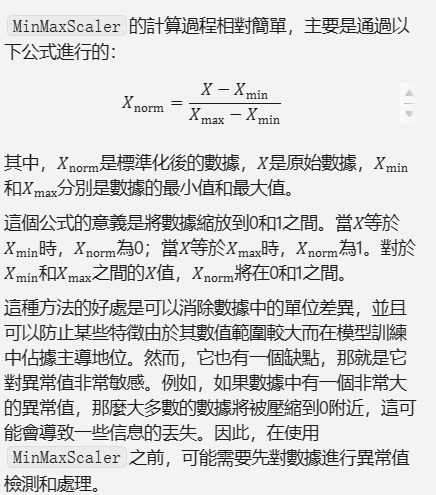

In [3]:
iris = load_iris()
df_data = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= ['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm','Species'])
df_data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


# 檢查缺失值

In [4]:
# 使用 pandas DataFrame 的 drop 函數移除 'Species' 欄位
# labels 參數指定要移除的欄位名稱
# axis=1 參數表示移除欄位（如果 axis=0，則表示移除列）
# values 屬性用於將 DataFrame 轉換為 numpy 陣列
X = df_data.drop(labels=['Species'],axis=1).values

# 從 DataFrame 中取得 'Species' 欄位的值，並將其存儲到 y 變數中
y = df_data['Species']

# 檢查 X 陣列中的缺失值（NaN）
# np.where 函數用於找出滿足條件的元素的索引
# np.isnan 函數用於檢查陣列中的元素是否為 NaN
# len 函數用於計算陣列中的元素數量
print("checked missing data(NAN mount):",len(np.where(np.isnan(X))[0]))


checked missing data(NAN mount): 0


## 測試1

In [7]:
X = df_data.drop(labels=['Species'],axis=1).values
print(X)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

## 測試2
*   numpy-->[陣列]
*   pandas-->only 數字

In [10]:
y = df_data['Species'].values
print(y)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2.]


In [11]:
y = df_data['Species']
print(y)

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
145    2.0
146    2.0
147    2.0
148    2.0
149    2.0
Name: Species, Length: 150, dtype: float64


# 參數資訊

In [6]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    float64
dtypes: float64(5)
memory usage: 6.0 KB


# 切割訓練集與測試集


> 以下是一個簡單的例子來說明 `stratify=y` 的意義：假設我們有一個數據集，其中包含 100 個樣本，這些樣本分為兩個類別：A 和 B。在這 100 個樣本中，類別 A 有 80 個樣本，類別 B 有 20 個樣本，所以類別 A 和類別 B 的比例是 4:1。現在，我們想要將這個數據集分割為訓練集和測試集，並且希望在分割後的訓練集和測試集中，類別 A 和類別 B 的比例仍然保持為 4:1。這時，我們就可以在使用 `train_test_split` 函數時設定 `stratify=y`，其中 `y` 是一個包含每個樣本類別的陣列。這樣，無論訓練集和測試集的大小如何變化，類別 A 和類別 B 的比例都會保持為 4:1，這對於確保模型的訓練效果和測試效果的一致性非常重要。






In [5]:
# 引入 sklearn.model_selection 的 train_test_split 函數
# 這個函數用於將數據集分割為訓練集和測試集
from sklearn.model_selection import train_test_split

# 使用 train_test_split 函數將數據集分割為訓練集和測試集
# X 是特徵數據，y 是目標變數
# test_size=0.3 表示測試集佔總數據的 30%
# random_state=42 用於確保每次分割都能得到相同的結果
# 42維隨機生成的機器學習種子
# stratify=y 表示在分割數據時會保持原始數據 y 的類別比例
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# 列印訓練集的形狀
# X_train.shape 會返回一個元組，表示訓練集的行數和列數
print('train shape:', X_train.shape)

# 列印測試集的形狀
# X_test.shape 會返回一個元組，表示測試集的行數和列數
print('test shape:', X_test.shape)

train shape: (105, 4)
test shape: (45, 4)


# Standardization平均&變異數標準化
* 何謂 **零均值**?

> 零均值"是一種統計術語，指的是一組數據的平均值為零。在數據分析和機器學習中，我們經常會對數據進行零均值化處理，也就是將每個數據點減去整體的平均值。

> 例如，假設我們有一組數據 [1, 2, 3, 4, 5]，其平均值為 3。我們可以將每個數據點減去平均值，得到新的數據集 [-2, -1, 0, 1, 2]，這個新的數據集就是零均值化後的結果，其平均值為零。

>**X_train_scaled** 為特徵的縮放值，這些值是通過從原始訓練集中的每個特徵中減去平均值並除以標準差來計算的。縮放後的值將具有零均值和單位方差。


In [7]:
#訓練集
# 引入 sklearn 的 StandardScaler 類別
from sklearn.preprocessing import StandardScaler

# 創建 StandardScaler 的實例
scaler = StandardScaler()

# 使用 fit_transform 方法對訓練數據進行標準化
# fit_transform 方法會先對數據進行 fit（學習轉換的參數），然後對同一數據進行 transform（進行轉換）
# 轉換後的數據將具有平均值和單位方差
X_train_scaled = scaler.fit_transform(X_train)

#print(X_train_scaled)

# 打印原始訓練數據的平均值和標準差
# 使用 numpy 的 mean 和 std 函數，設定 axis=0 表示沿著行的方向（即每一列）進行操作
print('資料集 X 的平均值 : ', X_train.mean(axis=0))
print('資料集 X 的標準差 : ', X_train.std(axis=0))

# 打印標準化後的訓練數據的平均值和標準差
# 由於數據已經被標準化，所以平均值應該接近 0，標準差應該接近 1
print('\nStandardScaler 縮放過後訓練集的平均值 : ', X_train_scaled.mean(axis=0))
print('StandardScaler 縮放過後訓練集的標準差 : ', X_train_scaled.std(axis=0))


資料集 X 的平均值 :  [5.87333333 3.0552381  3.7847619  1.20571429]
資料集 X 的標準差 :  [0.85882164 0.45502087 1.77553646 0.77383751]

StandardScaler 縮放過後訓練集的平均值 :  [ 0. -0. -0. -0.]
StandardScaler 縮放過後訓練集的標準差 :  [1. 1. 1. 1.]


In [8]:
# 測試集
X_test_scaled = scaler.transform(X_test)

print('\nStandardScaler 縮放過後測試集的平均值 : ', X_test_scaled.mean(axis=0))
print('StandardScaler 縮放過後測試集的標準差 : ', X_test_scaled.std(axis=0))


StandardScaler 縮放過後測試集的平均值 :  [-0.11643861  0.01534903 -0.05024191 -0.02748619]
StandardScaler 縮放過後測試集的標準差 :  [0.85754489 0.83947065 0.96847064 0.9374037 ]


In [9]:
# 縮放資料還原
X_test_inverse = scaler.inverse_transform(X_test_scaled)

## 測試1

In [1]:
from sklearn.preprocessing import StandardScaler
import numpy as np

# 假設我們有以下的訓練數據
X_train = np.array([[1, 2], [3, 4], [5, 6], [7, 8]])

# 創建 StandardScaler 的實例
scaler = StandardScaler()

# 使用 fit_transform 方法對訓練數據進行標準化
X_train_scaled = scaler.fit_transform(X_train)

# 打印標準化後的訓練數據
print(X_train_scaled)

# 打印原始訓練數據的平均值和標準差
print('資料集 X 的平均值 : ', X_train.mean(axis=0))
print('資料集 X 的標準差 : ', X_train.std(axis=0))

# 打印標準化後的訓練數據的平均值和標準差
print('\nStandardScaler 縮放過後訓練集的平均值 : ', X_train_scaled.mean(axis=0))
print('StandardScaler 縮放過後訓練集的標準差 : ', X_train_scaled.std(axis=0))


[[-1.34164079 -1.34164079]
 [-0.4472136  -0.4472136 ]
 [ 0.4472136   0.4472136 ]
 [ 1.34164079  1.34164079]]
資料集 X 的平均值 :  [4. 5.]
資料集 X 的標準差 :  [2.23606798 2.23606798]

StandardScaler 縮放過後訓練集的平均值 :  [0. 0.]
StandardScaler 縮放過後訓練集的標準差 :  [1. 1.]


# MinMaxScaler最小最大值標準化


In [12]:
# 引入 sklearn.preprocessing 的 MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

# 創建 MinMaxScaler 物件
scaler = MinMaxScaler()

# 使用 MinMaxScaler 對訓練集數據進行縮放
X_train_scaled = scaler.fit_transform(X_train)

In [13]:
# 打印原始訓練集的最小值和最大值
print('資料集 X 的最小值 : ', X_train.min(axis=0))
print('資料集 X 的最大值 : ', X_train.max(axis=0))

# 打印縮放後的訓練集的最小值和最大值
print('\nStandardScaler 縮放過後訓練集的最小值 : ', X_train_scaled.min(axis=0))
print('StandardScaler 縮放過後訓練集的最大值 : ', X_train_scaled.max(axis=0))

資料集 X 的最小值 :  [4.3 2.  1.1 0.1]
資料集 X 的最大值 :  [7.9 4.4 6.9 2.5]

StandardScaler 縮放過後訓練集的最小值 :  [0. 0. 0. 0.]
StandardScaler 縮放過後訓練集的最大值 :  [1. 1. 1. 1.]


In [14]:
X_test_scaled = scaler.transform(X_test)

print('\nStandardScaler 縮放過後測試集的最小值 : ', X_test_scaled.min(axis=0))
print('StandardScaler 縮放過後測試集的最大值 : ', X_test_scaled.max(axis=0))


StandardScaler 縮放過後測試集的最小值 :  [ 0.02777778  0.125      -0.01724138  0.04166667]
StandardScaler 縮放過後測試集的最大值 :  [0.83333333 0.83333333 0.89655172 0.95833333]
